# **1. Perkenalan Dataset**

## Dataset: Diamond Price Prediction 💎

- Proyek ini menggunakan dataset yang diambil dari Kaggle dan berfokus pada upaya memprediksi harga berlian (diamond).

- Dataset tersebut berisi berbagai fitur penting seperti karat (carat), potongan (cut), kejernihan (clarity), warna (color), dan dimensi berlian (x, y, z) proporsi berlian (table), yang semuanya digunakan untuk membangun model prediktif yang mampu memperkirakan harga secara akurat.

- Informasi dataset sebagai berikut:

| Jenis | Keterangan |
| ------ | ------ |
| Title | Data Analysis on Diamonds Dataset |
| Source | [Kaggle](https://www.kaggle.com/datasets/swatikhedekar/price-prediction-of-diamond) |
| Maintainer | [Swati Khedekar ⚡](https://www.kaggle.com/swatikhedekar) |
| License | Other (specified in description) |
| Visibility | Publik |
| Tags | Religion and Belief System, Beginner, Pandas, Matplotlib, Data Visualization, Regression, Exploratory Data Analysis_ |
| Usability | 10.00 |

# **2. Import Library**

Pada tahap ini, dilakukan impor beberapa pustaka (library) Python yang diperlukan untuk analisis data dan pembangunan model machine learning.

In [2]:
# Library umum
import math
import warnings
import kagglehub
import random
import itertools
warnings.filterwarnings('ignore')

# Library analisis dan visualisasi data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Library Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# **3. Memuat Dataset**

 - Pada tahap ini, saya memuat dataset berlian dari Kaggle ke dalam notebook. Karena dataset berada dalam format CSV, saya menggunakan pustaka pandas untuk membacanya.

- Selanjutnya, saya memeriksa beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

In [3]:
path = kagglehub.dataset_download("swatikhedekar/price-prediction-of-diamond")
print("Path to dataset files:", path)

diamonds_df = pd.read_csv(path + "/diamonds.csv")
diamonds_df.head()

100%|██████████| 733k/733k [00:00<00:00, 72.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/swatikhedekar/price-prediction-of-diamond/versions/3


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# **4. Exploratory Data Analysis (EDA)**

- Pada tahap ini, dilakukan Exploratory Data Analysis (EDA) untuk memahami karakteristik dataset.

- Tujuan dari EDA adalah memperoleh wawasan awal yang mendalam mengenai data serta menentukan langkah selanjutnya dalam proses analisis atau pemodelan.

## 4.1 EDA - Deskripsi Variabel

In [4]:
pd.DataFrame({'Kolom':diamonds_df.columns,
              'Tipe Data':diamonds_df.dtypes,
              'Jumlah Data Non-Null':diamonds_df.count(),
              'Jumlah Data Unik':diamonds_df.nunique(),
              'Contoh Data Unik':diamonds_df.apply(lambda x:', '.join(map(str, x.unique()[:8])))
            }).reset_index(drop=True)

,Kolom,Tipe Data,Jumlah Data Non-Null,Jumlah Data Unik,Contoh Data Unik
0,Unnamed: 0,int64,53940,53940,"1, 2, 3, 4, 5, 6, 7, 8"
1,carat,float64,53940,273,"0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3"
2,cut,object,53940,5,"Ideal, Premium, Good, Very Good, Fair"
3,color,object,53940,7,"E, I, J, H, F, G, D"
4,clarity,object,53940,8,"SI2, SI1, VS1, VS2, VVS2, VVS1, I1, IF"
5,depth,float64,53940,184,"61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61.9"
6,table,float64,53940,127,"55.0, 61.0, 65.0, 58.0, 57.0, 56.0, 54.0, 62.0"
7,price,int64,53940,11602,"326, 327, 334, 335, 336, 337, 338, 339"
8,x,float64,53940,554,"3.95, 3.89, 4.05, 4.2, 4.34, 3.94, 4.07, 3.87"
9,y,float64,53940,552,"3.98, 3.84, 4.07, 4.23, 4.35, 3.96, 4.11, 3.78"


- Insight:
  - Dari Hasil EDA dengan melihat variabel dan karateristiknya maka beberapa insight yang ditemukan:

1. **Penjelasan per Kolom** dijelaskan dibawah:
  - price: Harga berlian dalam dolar Amerika Serikat ($), yang merupakan label dalam analisis ini.

  - carat: Bobot berlian dalam satuan carat, yang digunakan sebagai ukuran dari batu permata dan perhiasan.

  - cut: Kualitas pemotongan berlian, yang memengaruhi bagaimana cahaya dipantulkan dari berlian tersebut. Kualitas cut dibagi dalam 5 kategori: Fair, Good, Very Good, Premium, dan Ideal, dengan Ideal sebagai yang terbaik dan Fair sebagai yang terendah.

  - color: Warna berlian, yang diukur dalam skala dari D (warna terbaik, sangat jernih) hingga J (paling buruk). Semakin dekat ke D, semakin tinggi kualitas berlian tersebut.

  - clarity: Tingkat kejernihan berlian diukur berdasarkan jumlah dan jenis inklusi (cacat) yang ada di dalamnya. Kategori kejernihan berlian dari yang terburuk hingga terbaik adalah sebagai berikut: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, dan IF (terbaik).

  - x: Panjang berlian dalam satuan milimeter (mm).

  - y: Lebar berlian dalam satuan milimeter (mm).

  - z: Kedalaman berlian dalam satuan milimeter (mm).

  - depth: Rasio kedalaman berlian yang dihitung sebagai 2 * z / (x + y).

  - table: Lebar bagian atas berlian relatif terhadap titik terlebar. Rasio ini memengaruhi pencahayaan dan efek visual berlian.                                                               |

  - Sebagai referensi untuk pemahaman lebih lanjut mengenai kualitas berlian dan klasifikasinya, dapat dilihat pada sumber [ggplot2 Tidyverse Diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html), yang memberikan deskripsi lengkap mengenai karakteristik berlian serta standar kualitas seperti cut, color, dan clarity.

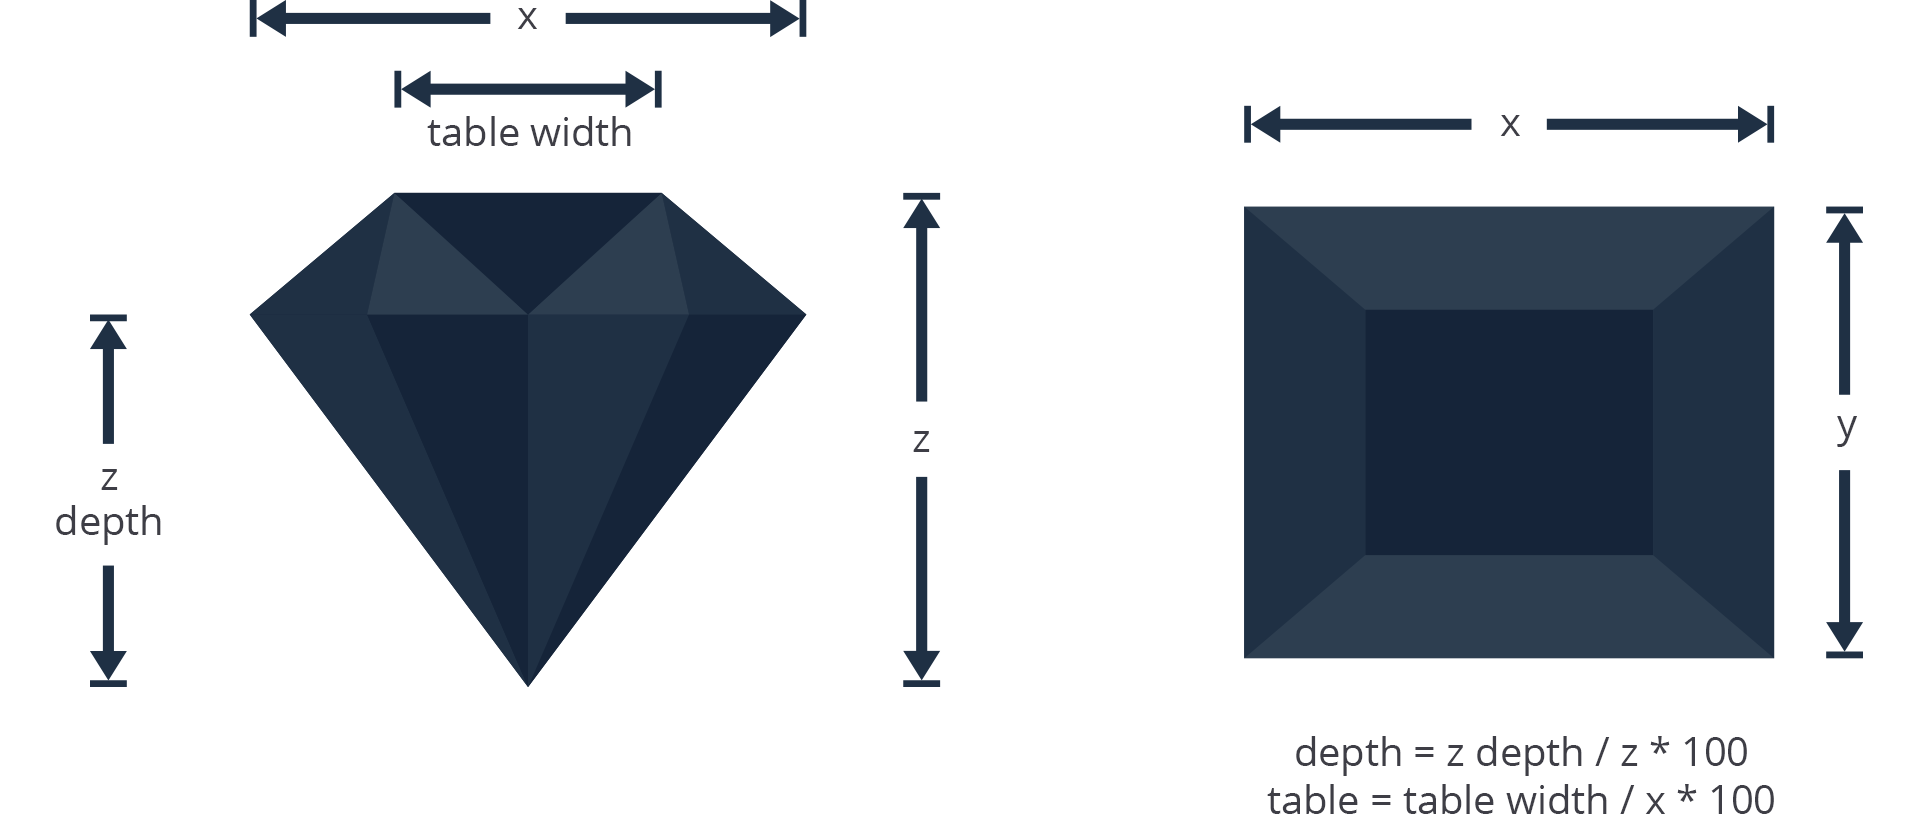

In [9]:
# Mencopy untuk keperluan eda lanjut dan drop kolom unnamed : 0 karena akan menggangu proses eda seperti pengecekan duplikat
diamonds_df_eda = diamonds_df.copy()
diamonds_df_eda = diamonds_df_eda.drop(columns='Unnamed: 0')

In [10]:
# Cek informasi statistik dari dataset
diamonds_df_eda.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


- Insight:
  - Ditemukan kejanggalan pada kolom x, y, dan z, di mana terdapat nilai minimum sebesar 0.
  - Nilai 0 pada panjang, lebar, dan kedalaman berlian mustahil ada karena ukuran fisik berlian tidak mungkin nol.
  - Kemungkinan besar, nilai 0 tersebut merupakan representasi dari data yang hilang (missing value) yang disamarkan.

## 4.2 EDA - Mengecek Missing Values

In [11]:
# Ubah nilai nol di kolom x, y, dan z

diamonds_df_eda['x'].replace({0:np.nan}, inplace=True)
diamonds_df_eda['y'].replace({0:np.nan}, inplace=True)
diamonds_df_eda['z'].replace({0:np.nan}, inplace=True)

In [12]:
# Cek nilai missing
diamonds_df_eda.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,8
y,7
z,20


- Insight:
  - Ditemukan nilai missing (null) pada kolom x sebanyak 8 data, y sebanyak 7 data, dan z sebanyak 20 data setelah proses konversi nilai 0 yang dianggap invalid menjadi missing value.
  - Jumlah missing tersebut tergolong sangat kecil dibandingkan total data sebanyak 53.940 baris.
  - Oleh karena itu, menghapus baris yang mengandung missing value dianggap sebagai solusi yang wajar dan tidak berdampak signifikan terhadap keseluruhan data.
  - Data ini nantinya akan dihapus saat proses preprocessing.

## 4.3 EDA - Mengecek Data Duplikat

In [13]:
print(f'Jumlah data duplikat yang ditemukan : {diamonds_df_eda.duplicated().sum()}')

Jumlah data duplikat yang ditemukan : 146


- Insight:
  - Dari hasil pengecekan ditemukan 146 data yang duplikat dari data ini.
  - Data ini nantinya akan dihapus saat proses preprocessing.

## 4.4 EDA - Mengecek Outlier

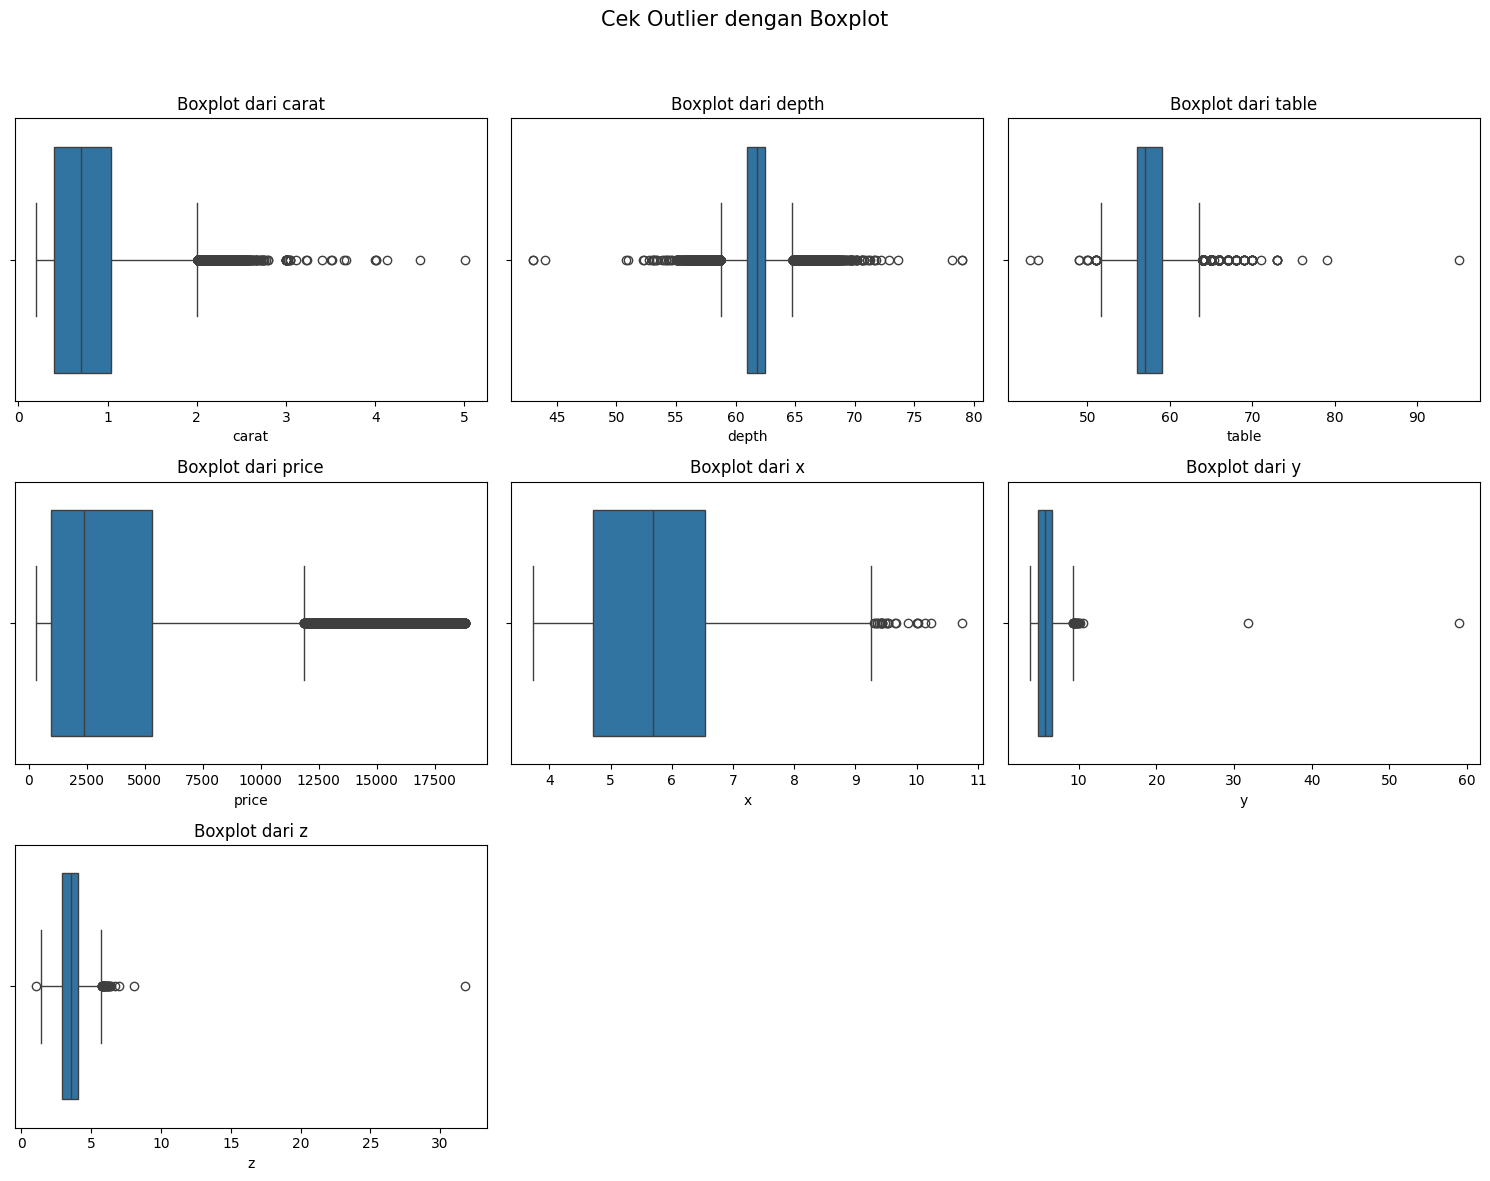

In [14]:
# Membuat visualisasi (boxplot) untuk melihat outlier dari masing-masing data

## 1. Untuk melihat outlier ambil fitur bertipe numerik
diamonds_df_eda_num = diamonds_df_eda.select_dtypes(include='number')

## 2. Mempersiapkan data
max_col = 3
max_row = math.ceil(len(diamonds_df_eda_num.columns)/max_col)

## 3. Membuat plot
plt.figure(figsize=(15, 12))
for i, col in enumerate(diamonds_df_eda_num.columns):
  plt.subplot(max_row, max_col, i+1)
  sns.boxplot(data = diamonds_df_eda_num, x=col)
  plt.title(f'Boxplot dari {col}')

## 4. Menampilkan plot
plt.suptitle('Cek Outlier dengan Boxplot', size=15)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

- Insight:
  - Berdasarkan grafik boxplot yang ditampilkan terlihat bahwa setiap fitur numerik memiliki outlier.
  - Outlier ini dapat ditangani dengan cara menghapusnya setelah diidentifikasi menggunakan metode IQR saat proses preprocessing.

## 4.5 EDA - Univariate Analysis

### 4.5.1 Catagorical Features
  - Pada tahapan ini, akan dibuat barplot untuk melihat distribusi jumlah data berdasarkan kategori pada setiap fitur.


In [15]:
def categorical_check(df, col):
  count = df[col].value_counts()
  percentage = 100 * df[col].value_counts(normalize=True)
  col_df = pd.DataFrame({'Jumlah Sampel' : count, 'persentase' : percentage.round(1)})
  col_df['persentase'] = col_df['persentase'].astype('str') + '%'

  plt.figure(figsize=(10,6))
  palette = ['pastel', 'muted', 'deep', 'bright', 'dark', 'Set2', 'colorblind']
  ax = sns.barplot(x=col_df.index, y=col_df['Jumlah Sampel'], palette=random.choice(palette))
  for i,v in enumerate(col_df['Jumlah Sampel']):
    ax.text(i, v, str(v), ha='center', va='bottom')
  plt.xlabel(col)
  plt.ylabel('Jumlah Sampel')
  plt.title(f'Barplot dari {col}')
  plt.show

  return col_df

,Jumlah Sampel,persentase
cut,,
Ideal,21551,40.0%
Premium,13791,25.6%
Very Good,12082,22.4%
Good,4906,9.1%
Fair,1610,3.0%


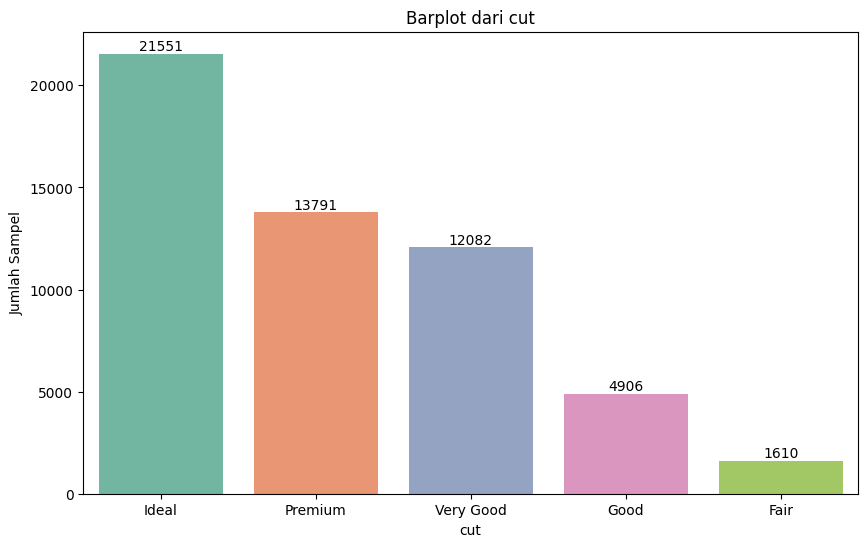

In [16]:
categorical_check(diamonds_df_eda , 'cut')

- Insight:
  - Berdasarkan visualisasi, mayoritas cut dari diamond berada pada kategori yang baik, yaitu Ideal dan Premium, yang secara keseluruhan mencakup sekitar 65% dari total data.

  - Sementara itu, cut dengan kualitas terendah yaitu Fair, hanya mencakup sekitar 3% dari keseluruhan sampel.

,Jumlah Sampel,persentase
color,,
G,11292,20.9%
E,9797,18.2%
F,9542,17.7%
H,8304,15.4%
D,6775,12.6%
I,5422,10.1%
J,2808,5.2%


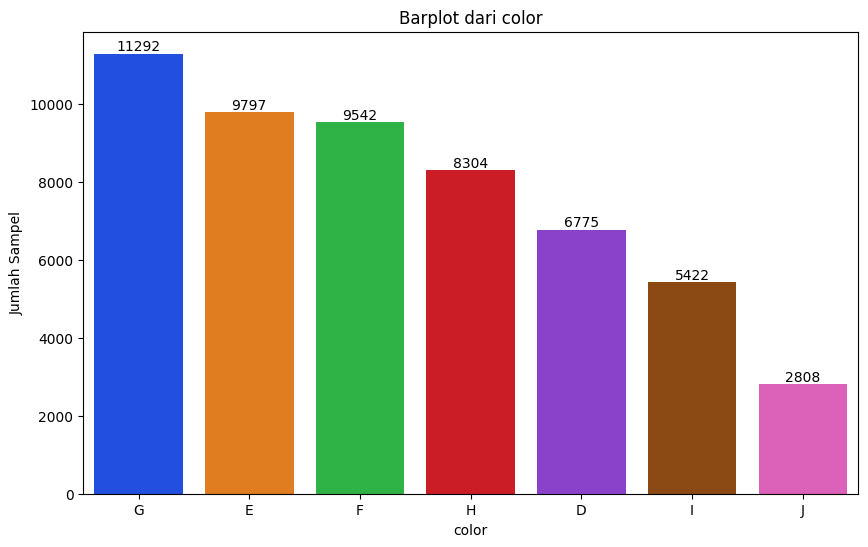

In [17]:
categorical_check(diamonds_df_eda , 'color')

- Insight:
  - Berdasarkan grafik di atas, sebagian besar diamond berada pada kualitas color (warna) yang tergolong menengah hingga agak baik, yaitu pada color G, E, dan F, yang mencakup sekitar 56,8% dari total data.

,Jumlah Sampel,persentase
clarity,,
SI1,13065,24.2%
VS2,12258,22.7%
SI2,9194,17.0%
VS1,8171,15.1%
VVS2,5066,9.4%
VVS1,3655,6.8%
IF,1790,3.3%
I1,741,1.4%


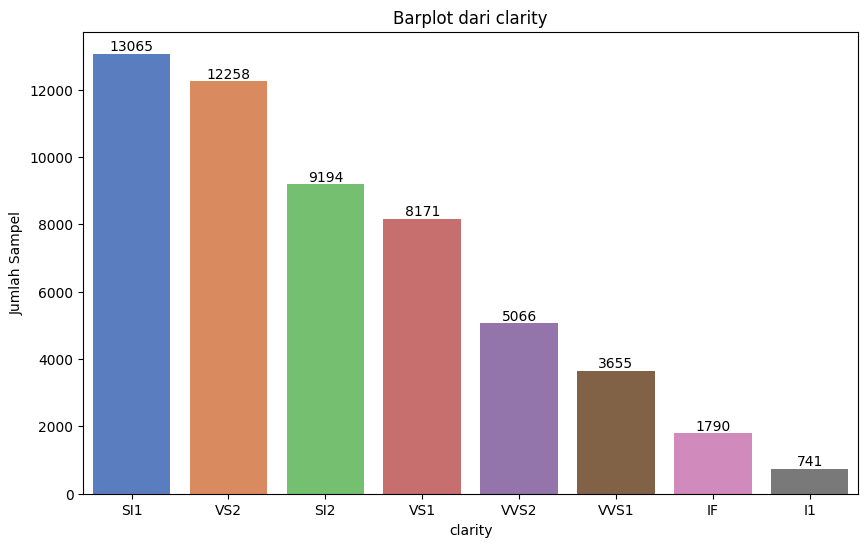

In [18]:
categorical_check(diamonds_df_eda , 'clarity')

- Insight:
  - Berdasarkan grafik di atas, sebagian besar diamond berkualitas kejernihan (clarity) yang rendah hingga menengah, dengan sekitar 64% di antaranya berada pada kategori SI2, SI1, dan VS2.

  - Di sisi lain, berlian dengan kualitas kejernihan terendah (I1) hanya mencakup sekitar 1%, sementara yang memiliki kualitas terbaiknya (IF) mencapai sekitar 3% dari total data.

### 4.5.2 Numerical Feature
 - Membuat visualisasi fitur numerikal dengan histogram untuk melihat persebaran datanya

carat    1.116646
depth   -0.082294
table    0.796896
price    1.618395
x        0.398474
y        2.460552
z        1.585490
dtype: float64


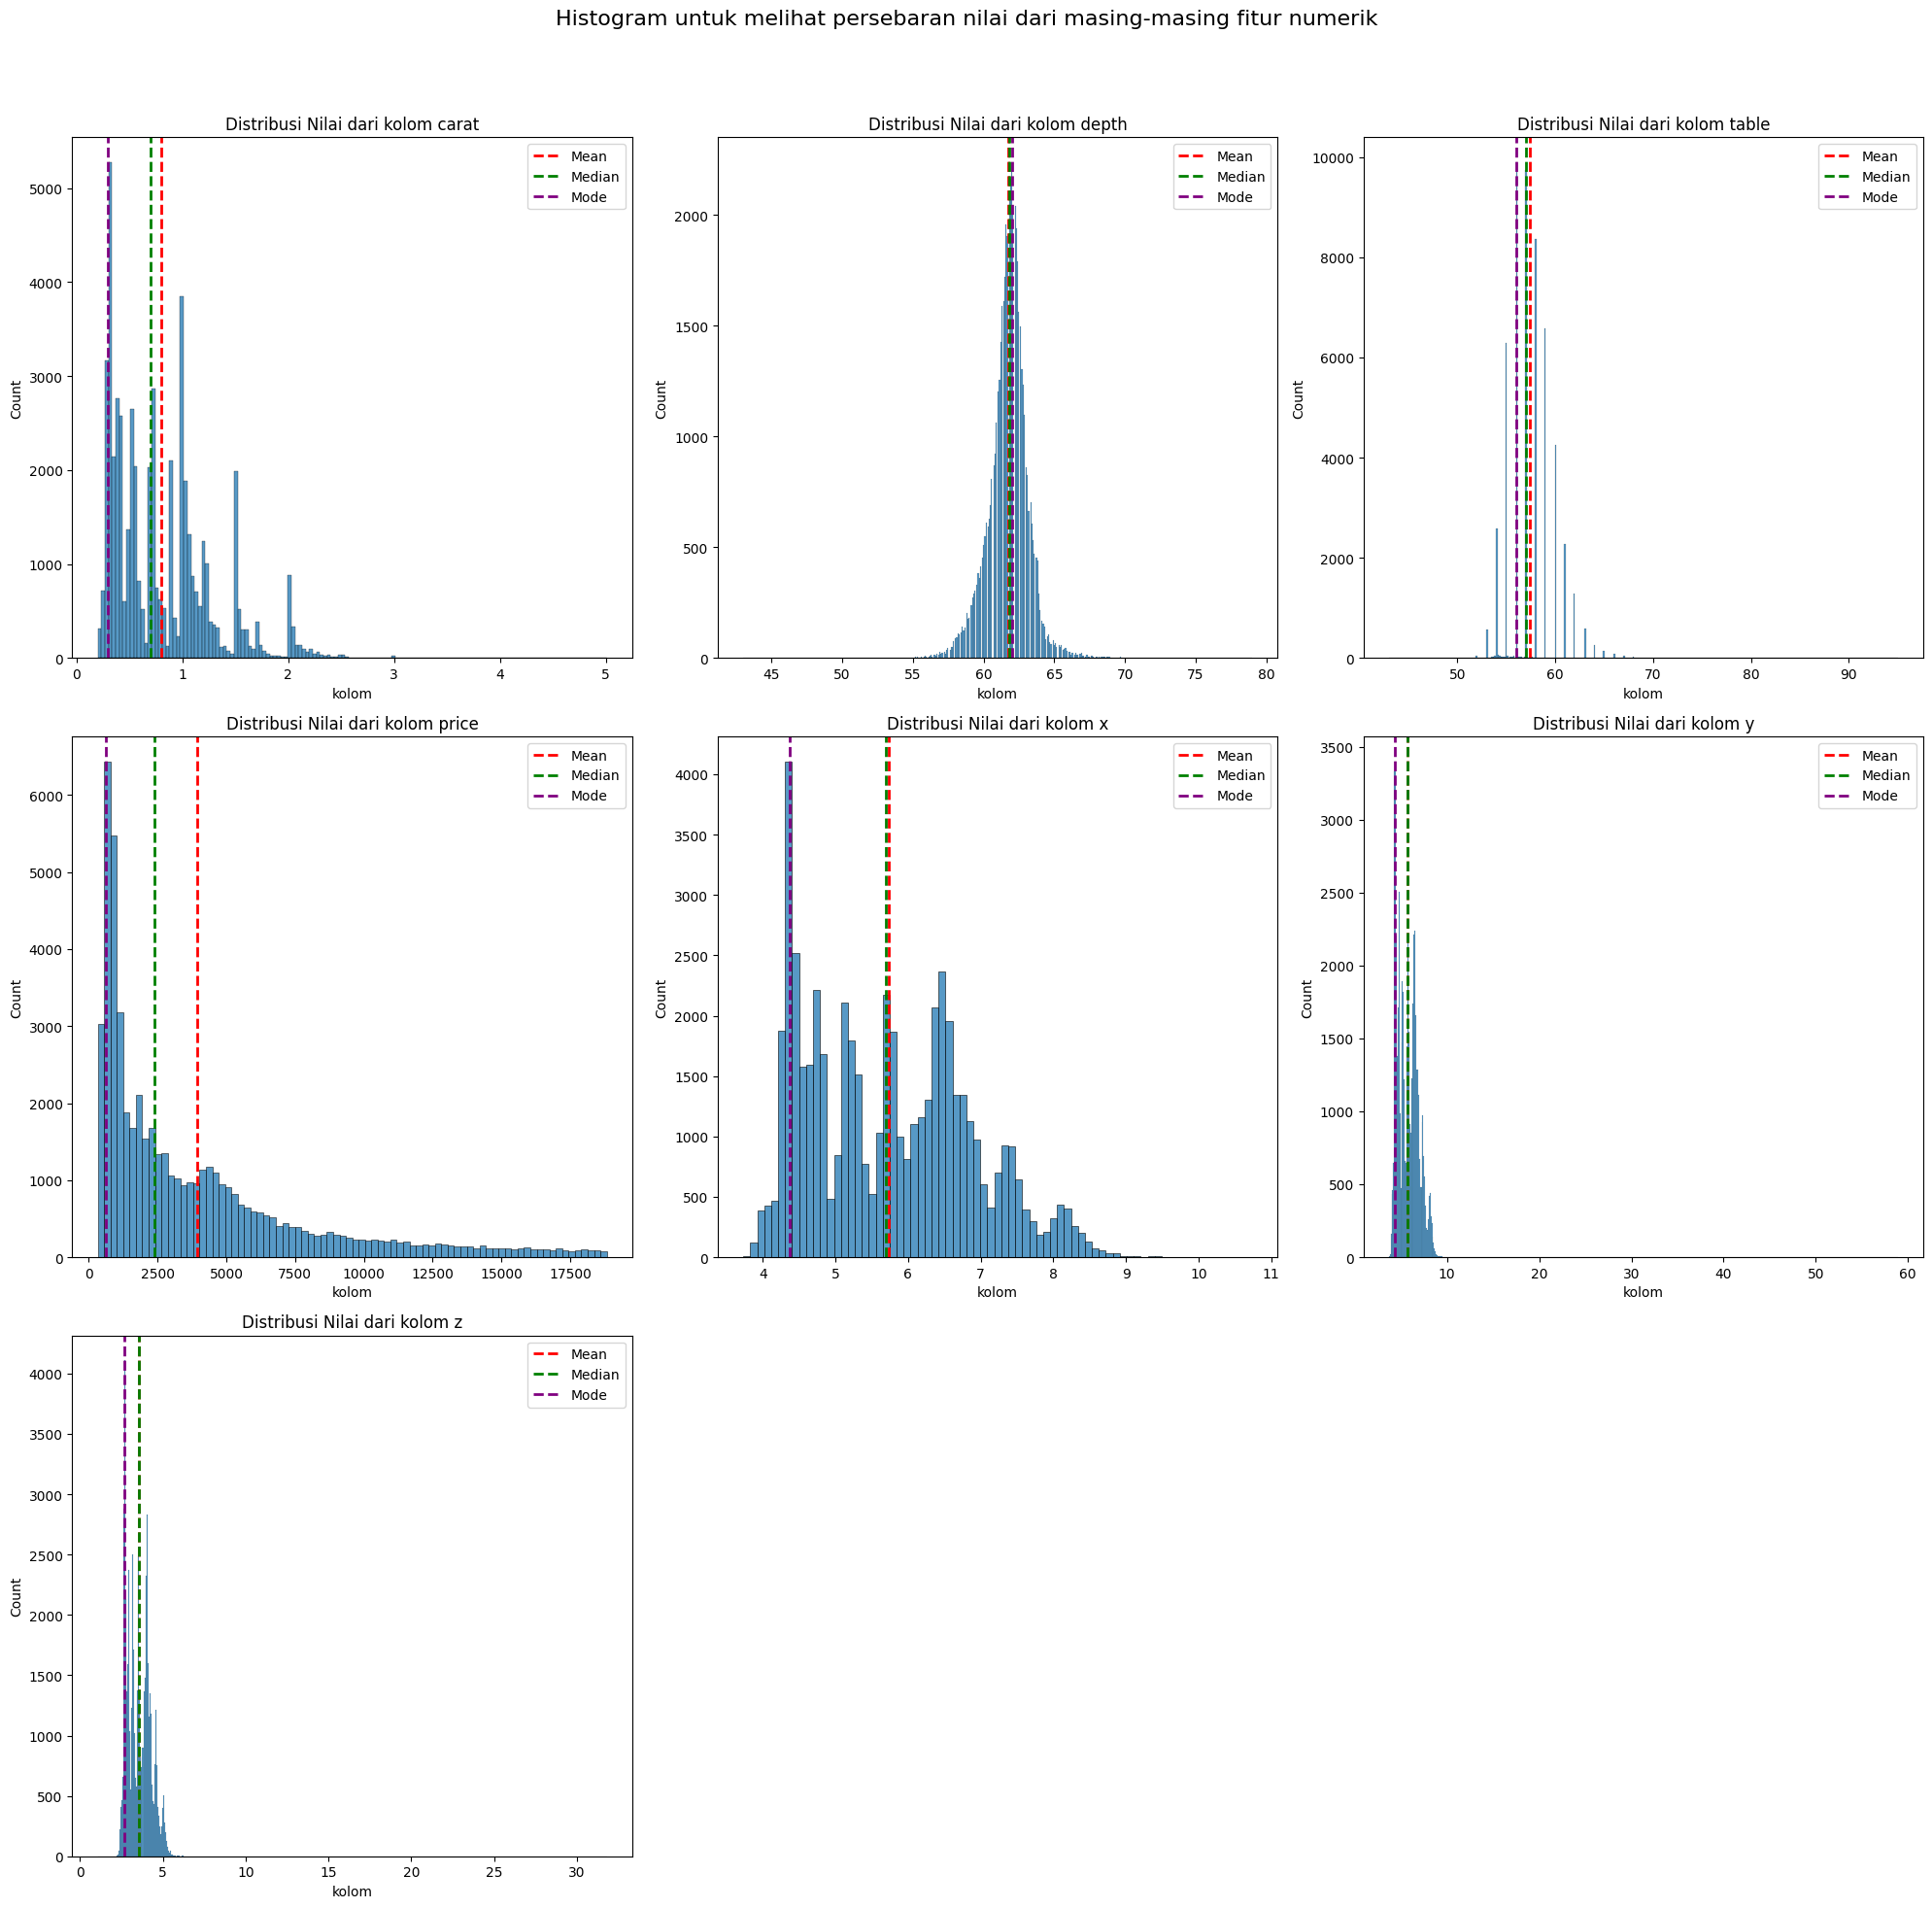

In [20]:
# Melihat nilai skewness
print(diamonds_df_eda_num.skew())

# Membuat visualisasi dengan barplot

## 1. Mempersiapkan datanya
max_col = 3
max_row = math.ceil(len(diamonds_df_eda_num.columns)/max_col)

## 2. Membuay plot
plt.figure(figsize=(20, 20))

for i, col in enumerate(diamonds_df_eda_num.columns):
  mean_value = diamonds_df_eda_num[col].mean()
  median_value = diamonds_df_eda_num[col].median()
  mode_value = diamonds_df_eda_num[col].mode()[0]

  plt.subplot(max_row, max_col, i+1)
  sns.histplot(data=diamonds_df_eda_num, x=col)

  plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
  plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label='Median')
  plt.axvline(mode_value, color='purple', linestyle='dashed', linewidth=2, label='Mode')
  plt.legend()

  plt.title(f'Distribusi Nilai dari kolom {col}')
  plt.xlabel('kolom')

plt.suptitle('Histogram untuk melihat persebaran nilai dari masing-masing fitur numerik', size=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- **Insight:**

  1. **carat**
     - Distribusi nilai pada kolom **carat** bersifat **right-skewed sedang**. Hal ini ditunjukkan oleh skewness sebesar **1.116**, serta pola histogram yang menunjukkan sebagian besar data terpusat pada nilai kecil dengan ekor yang memanjang ke kanan. Rata-rata (mean) lebih besar dari median dan modus.

  2. **depth**
     - Distribusi nilai pada kolom **depth** mendekati **normal (simetris)**. Skewness-nya sangat kecil, yaitu **-0.082**, dan **mean**, **median**, serta **modus** hampir berhimpitan. Histogram memperlihatkan sebaran yang simetris di sekitar pusat data.

  3. **table**
     - Kolom **table** menunjukkan distribusi sedikit **right-skewed**, dengan nilai skewness sebesar **0.797**. Histogram menggambarkan puncak distribusi di tengah dengan sedikit pergeseran nilai ke kanan, serta mean yang sedikit lebih besar dari median dan modus.

  4. **price**
     - Distribusi nilai pada kolom **price** bersifat sangat **right-skewed**, dengan skewness sebesar **1.618**. Histogram menunjukkan konsentrasi data pada nilai rendah dan ekor panjang ke kanan. Perbedaan antara mean, median, dan modus cukup mencolok.

  5. **x**
     - Kolom **x** memiliki distribusi sedikit **right-skewed**, ditunjukkan oleh skewness sebesar **0.398**. Histogram memperlihatkan sebaran yang relatif seimbang namun tetap memiliki kecenderungan ke kanan.

  6. **y**
     - Distribusi kolom **y** bersifat sangat **right-skewed**, dengan nilai skewness tertinggi yaitu **2.461**. Histogram menunjukkan banyak nilai kecil di sisi kiri dengan ekor distribusi yang sangat panjang ke kanan. **Mean**, **median**, dan **modus** berhimpitan di bagian kiri.

  7. **z**
     - Distribusi nilai pada kolom **z** juga sangat **right-skewed**, dengan skewness sebesar **1.585**. Polanya serupa dengan kolom **y**, di mana mayoritas data terkumpul pada nilai kecil dan sebagian kecil tersebar jauh di nilai tinggi. **Mean**, **median**, dan **modus** saling berdekatan di bagian kiri distribusi.

- Fitur-fitur yang memiliki distribusi right-skewed disarankan untuk ditransformasi menggunakan logarithmic transformation atau power transformation guna mendekatkan distribusi ke bentuk normal dan meningkatkan performa model.


## 4.6 EDA - Multivariate Analysis

### 4.6.1 Categorical Feature
- Pada bagian ini, dilakukan pembuatan tabel dan barplot untuk melihat hubungan atau korelasi antara fitur kategorikal dengan label atau target, yaitu price.

In [21]:
diamonds_df_eda_cat = diamonds_df_eda.select_dtypes(exclude='number')

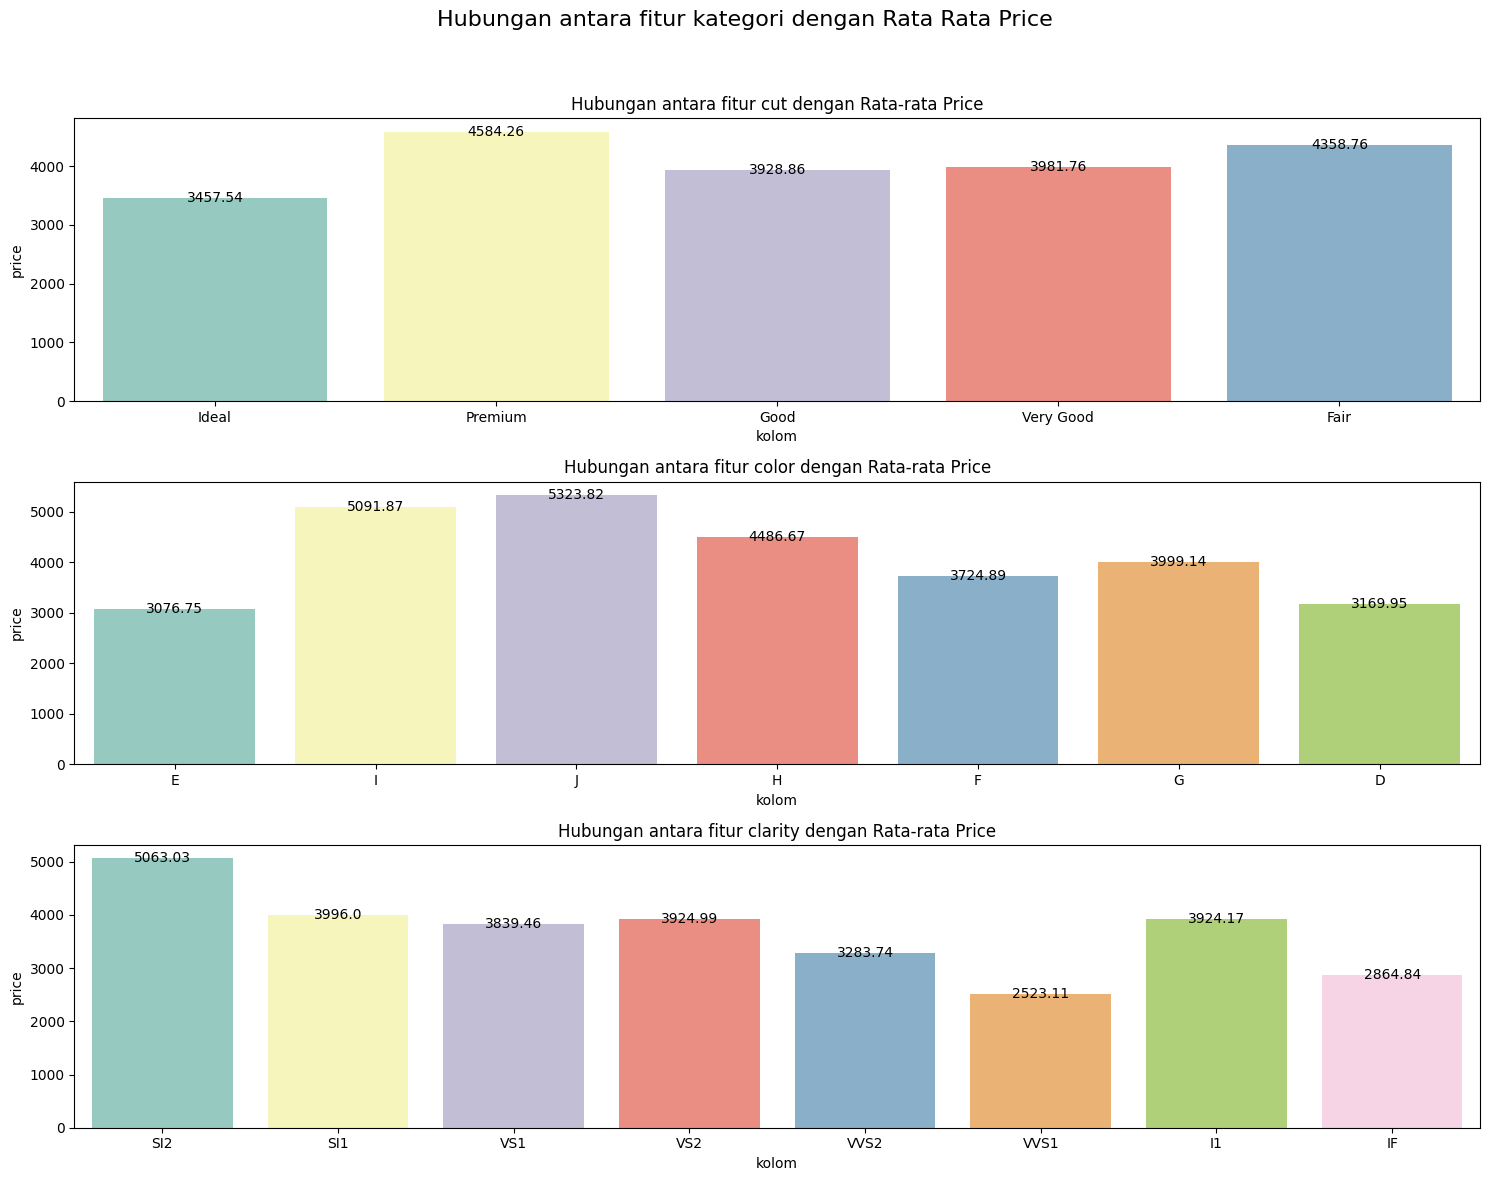

In [22]:
# Membuat visualisasi dengan barplot

## 1. Mempersiapkan datanya
max_col = 1
max_row = math.ceil(len(diamonds_df_eda_cat.columns)/max_col)

## 2. Membuay plot
plt.figure(figsize=(15, 12))

for i, col in enumerate(diamonds_df_eda_cat.columns):
  plt.subplot(max_row, max_col, i+1)
  ax = sns.barplot(data=diamonds_df, x=col, y='price', palette='Set3', errorbar=None, estimator='mean')
  for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2,
            bar.get_height(),
            round(bar.get_height(), 2),
            ha='center',
            va='center')

  plt.title(f'Hubungan antara fitur {col} dengan Rata-rata Price')
  plt.xlabel('kolom')
  plt.ylabel('price')

plt.suptitle('Hubungan antara fitur kategori dengan Rata Rata Price', size=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- Insight:
  - Meskipun terdapat perbedaan kualitas dalam setiap fitur kategorikal (cut, color, clarity), harga rata-rata diamond tetap berada dalam kisaran yang relatif mirip, tanpa fluktuasi yang signifikan. Ini menunjukkan bahwa kualitas kategori tidak secara langsung menentukan harga. Berikut detailnya:

    1. Fitur cut:
    - Rata-rata harga diamond berada dalam rentang 3500 hingga 4500 untuk semua kategori cut. Bahkan, grade tertinggi seperti Ideal justru memiliki harga rata-rata yang lebih rendah dibandingkan beberapa grade lain. Ini menunjukkan bahwa cut memiliki pengaruh yang relatif kecil terhadap harga.

    2. Fitur color:
    - Warna terbaik dimulai dari grade D (paling bening), dan menurun ke E, F, hingga J. Namun, data menunjukkan bahwa harga rata-rata diamond tidak selalu lebih tinggi pada grade warna yang lebih baik. Bahkan, grade D tidak memiliki rata-rata harga tertinggi. Ini mengindikasikan bahwa fitur color memiliki pengaruh yang rendah terhadap harga.

    3. Fitur clarity:
    - Meskipun grade clarity yang lebih tinggi (misalnya IF atau VVS1) secara teknis lebih baik, rata-rata harganya tidak selalu lebih tinggi. Beberapa grade menengah seperti VS2 atau SI2 justru menunjukkan harga rata-rata yang cukup tinggi, menandakan bahwa fitur clarity juga memiliki pengaruh yang terbatas terhadap harga.

  - Ketiga fitur kategorikal (cut, color, dan clarity) memiliki pengaruh yang rendah terhadap perubahan rata-rata harga diamond.

### 4.6.2 Numerical Feature
- Disini, saya mau melihat hubungan/korelasi antara fitur numerik dengan label/targetnya yaitu price

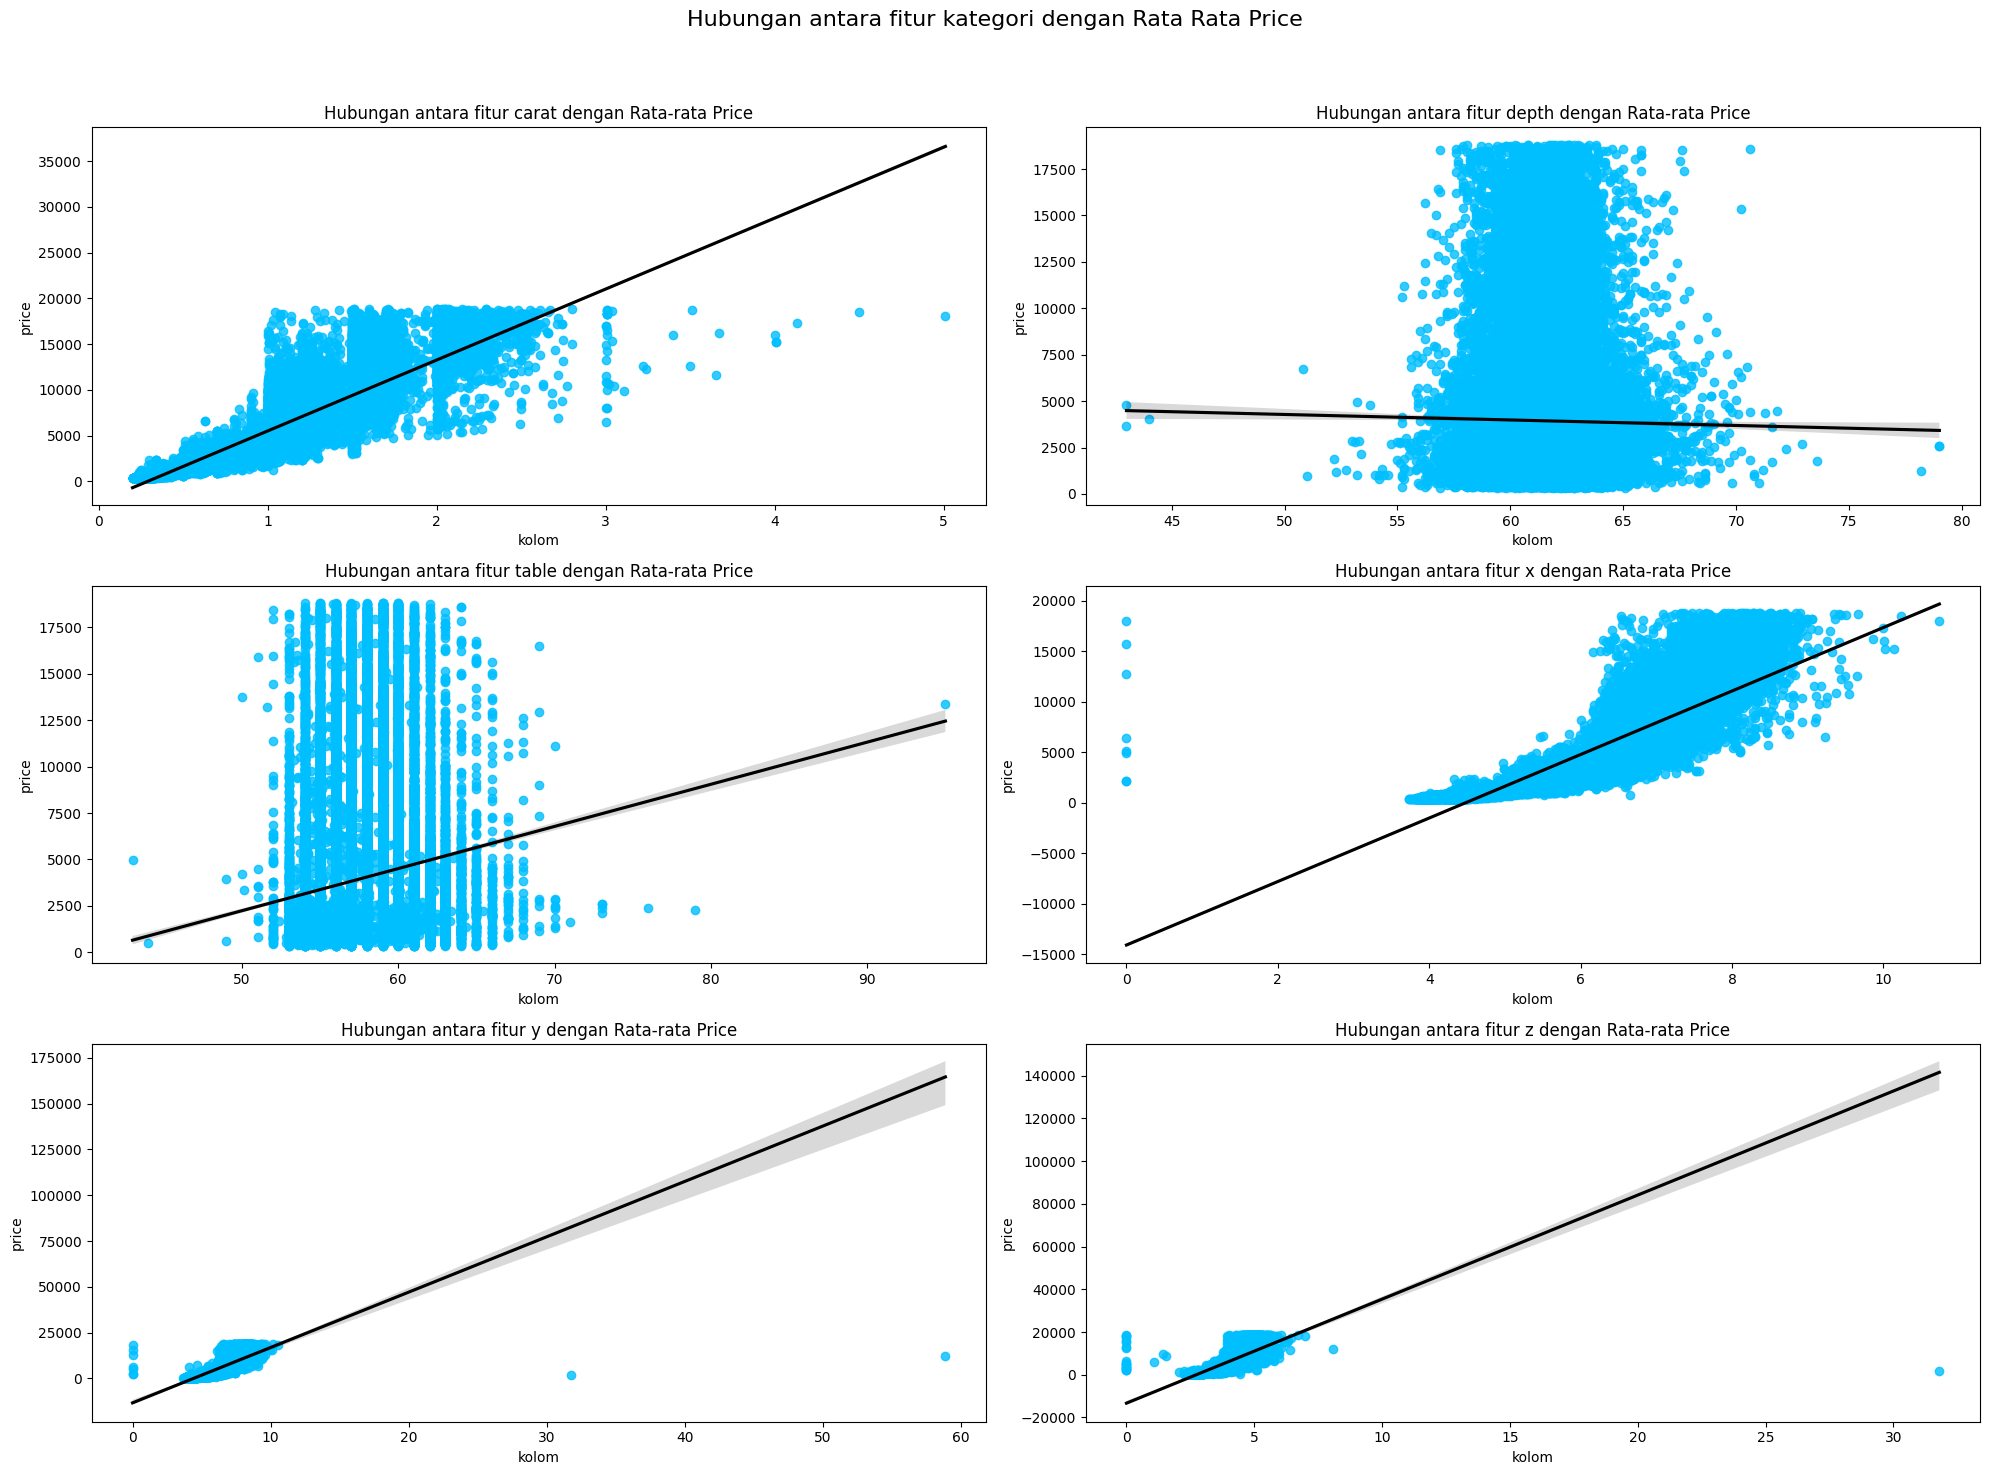

In [24]:
# Membuat visualisasi regplot

## 1. Mempersiapkan datanya
max_col = 2
max_row = math.ceil(len(diamonds_df_eda_num.drop(columns='price').columns)/max_col)

## 2. Membuay plot
plt.figure(figsize=(20, 15))

for i, col in enumerate(diamonds_df_eda_num.drop(columns='price').columns):
  plt.subplot(max_row, max_col, i+1)
  sns.regplot(data=diamonds_df, x=col, y='price', scatter_kws={'color':'deepskyblue'}, line_kws={'color':'black'})
  plt.title(f'Hubungan antara fitur {col} dengan Rata-rata Price')
  plt.xlabel('kolom')
  plt.ylabel('price')

plt.suptitle('Hubungan antara fitur kategori dengan Rata Rata Price', size=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<Axes: >

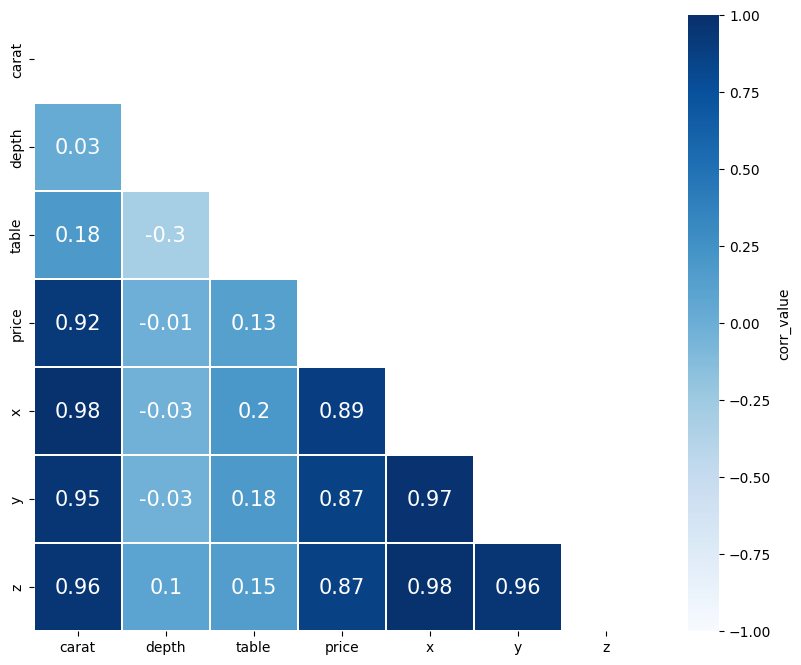

In [26]:
corr_matrix = diamonds_df_eda_num.corr().round(2)

# Membuat Grafik Heatmap
plt.figure(figsize=(10,8), dpi=100)
sns.heatmap(
    data=corr_matrix,
    vmin=-1,
    vmax=1,
    cmap='Blues',
    annot=True,
    annot_kws={'size':15, 'color':'white'},
    cbar_kws={'label':'corr_value'},
    square = True,
    lw = 0.1,
    mask=np.triu(np.ones_like(corr_matrix, dtype=bool))

)

- Insight:
  - Berdasarkan dua visualisasi yang diberikan, terlihat hubungan antara masing-masing fitur dengan label (price) sebagai berikut:
  1. Tidak Ada Korelasi
      - Fitur depth tidak menunjukkan korelasi dengan price. Hal ini terlihat dari regplot yang garis regresinya yang sejajar, serta tidak ada pola yang jelas antara depth dan price. Hal ini menyebabkan fitur **depth** dapat dihapus saat proses preprocessing.

  2. Korelasi Sangat Lemah
      - Fitur table memiliki korelasi positif yang sangat lemah dengan price. Ditunjukkan oleh regplot yang hanya menunjukkan kenaikan yang sangat kecil, serta nilai korelasi yang rendah, yaitu sekitar 0.18.

  3. Korelasi Sangat Kuat
      - Fitur carat, x, y, dan z menunjukkan korelasi positif yang sangat kuat dengan price. Artinya, semakin besar ukuran dan berat diamond, maka harga cenderung semakin tinggi.

  4. Korelasi Antar Fitur
    - Terdapat korelasi yang sangat tinggi antar fitur carat, x, y, dan z (corr ≈ 0.96-1), yang menunjukkan adanya multikolinearitas. Hal ini dapat mempengaruhi kinerja model regresi. Disarankan untuk mereduksi fitur-fitur ini, misalnya dengan menggunakan PCA, atau menggunakan model berbasis pohon (tree-based models) yang lebih robust terhadap masalah multikolinearitas.


# **5. Data Preprocessing**
- Pada tahapan ini, dilakukan preprocessing yang diperlukan sebelum melanjutkan ke tahap pelatihan model.

- Preprocessing bertujuan untuk mempersiapkan data agar lebih siap digunakan oleh model machine learning.

## 5.1 Menghapus Kolom yang tidak berguna
- Berdasarkan hasil EDA, terdapat dua kolom dalam dataset yang tidak memberikan informasi penting untuk analisis lebih lanjut, yaitu kolom unnamed: 0 dan depth.

- Kedua kolom ini akan dihapus karena tidak relevan dan tidak memiliki korelasi yang kuat terhadap label sehingga tidak memberikan informasi yang berguna bagi model.

In [27]:
diamonds_df_clean = diamonds_df.drop(columns=['Unnamed: 0', 'depth'])
diamonds_df_clean.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75


## 5.2 Menangani Nilai yang missing
- Berdasarkan hasil EDA, ditemukan bahwa terdapat beberapa nilai yang missing pada dataset. Karena jumlahnya sangat sedikit, baris dengan nilai yang missing akan dihapus.

In [30]:
diamonds_df_clean = diamonds_df_clean.dropna()

## 5.3 Menghapus Data yang Duplikat
- Berdasarkan hasil EDA, ditemukan adanya beberapa data duplikat dalam dataset. Data duplikat ini akan dihapus untuk memastikan bahwa pelatihan model tidak dipengaruhi oleh entri yang berulang.

In [31]:
diamonds_df_clean = diamonds_df_clean.drop_duplicates()

## 5.4 Menangani Outlier
- Dari hasil EDA, ditemukan adanya outlier pada semua fitur. Outlier ini akan diidentifikasi menggunakan metode IQR (Interquartile Range) dan dihapus karena dapat mempengaruhi hasil dan kinerja model.

In [32]:
# Menghapus Outlier
num_feature = diamonds_df_clean.select_dtypes(include='number')

## 1. Menentukan IQR
Q1 = num_feature.quantile(q=0.25)
Q3 = num_feature.quantile(q=0.75)
IQR = Q3-Q1

## 2. Menentukan Batas Bawah dan Batas Atas
BB = Q1 - (IQR * 1.5)
BA = Q3 + (IQR * 1.5)

## 3. Cek dan hapus outlier
mask_outlier = ((num_feature < BB) | (num_feature > BA)).any(axis=1)
clean_index = num_feature.index[~mask_outlier]
diamonds_df_clean = diamonds_df_clean.loc[clean_index]

In [33]:
print(f'Jumlah baris dan kolom sebelum penanganan adalah {diamonds_df.shape}')
print(f'Jumlah baris dan kolom setelah penanganan adalah {diamonds_df_clean.shape}')

Jumlah baris dan kolom sebelum penanganan adalah (53940, 11)
Jumlah baris dan kolom setelah penanganan adalah (49490, 9)


## 5.5 Menangani Data Skewed
- Berdasarkan hasil EDA, hampir semua fitur memiliki distribusi yang right-skewed, kecuali fitur depth (yang sebelumnya sudah dihapus).

- Untuk mengatasi hal ini dan membuat distribusi data lebih mendekati normal, dilakukan transformasi menggunakan Power Transformer.

In [36]:
# Membuat fungsi untuk transformasi

# 1. Salin dataframe asli
df_transformed = diamonds_df_clean.copy()

# 2. Siapkan dictionary untuk menyimpan transformer tiap kolom
power_transformers = {}

# 3. Daftar kolom yang akan ditransformasi
cols_to_transform = ['carat', 'table', 'x', 'y', 'z', 'price']

# 4. Lakukan transformasi dan simpan objek transformernya
for col in cols_to_transform:
    transformer = PowerTransformer(standardize=True)
    y = np.asarray(df_transformed[col]).reshape(-1, 1)
    df_transformed[f'transform_{col}'] = transformer.fit_transform(y)
    df_transformed.drop(columns=[col], inplace=True)
    power_transformers[col] = transformer

# 5. Gabungkan kembali dengan kolom kategorikal
transform_diamonds_df_clean = df_transformed.copy()
transform_diamonds_df_clean.head()

,cut,color,clarity,transform_carat,transform_table,transform_x,transform_y,transform_z,transform_price
0,Ideal,E,SI2,-1.696077,-1.172103,-1.861255,-1.834597,-1.870502,-2.066335
1,Premium,E,SI1,-1.810277,1.646136,-1.948006,-2.038412,-2.151685,-2.066335
3,Premium,I,VS2,-1.375891,0.394356,-1.512996,-1.487169,-1.428697,-2.038556
4,Good,J,SI2,-1.276043,0.394356,-1.326689,-1.327398,-1.178260,-2.035132
5,Very Good,J,VVS2,-1.640436,-0.088450,-1.875625,-1.863291,-1.757023,-2.031718


## 5.6 Mengidentifikasi Fitur (X) dan Label (y)
- Dari dataset diamond , fitur (X) terdiri dari seluruh kolom kecuali kolom price.

- Kolom price digunakan sebagai label (y) karena merupakan target yang ingin diprediksi.

In [37]:
X = transform_diamonds_df_clean.drop(columns='transform_price')
y = transform_diamonds_df_clean['transform_price']

## 5.7. Split Data Train - Testing
- Disini dilakukan pembangian datanya dengan proporsi 80% data latih dan 20% data uji

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Jumlah data awalnya : {len(X)}')
print(f'Jumlah data train : {len(X_train)}')
print(f'Jumlah data test : {len(X_test)}')

Jumlah data awalnya : 49490
Jumlah data train : 39592
Jumlah data test : 9898


## 5.8 Feature Encoding
- Adapun tahapan terakhir dalam data preparation adalah dilakukan encoding pada kolom fitur kategorikal menggunakan teknik one-hot encoding.

- One-hot encoding dipilih karena fitur-fitur kategorikal tersebut tidak memiliki urutan atau hubungan numerik yang jelas terhadap label (bersifat nominal), sehingga teknik ini paling sesuai untuk merepresentasikan nilai-nilai kategorikal tersebut secara adil tanpa memberikan bobot tertentu.

In [41]:
# Melakukan one-hot encoding pada kolom kategorikal

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[['cut', 'color', 'clarity']]), columns=encoder.get_feature_names_out(['cut', 'color', 'clarity']))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[['cut', 'color', 'clarity']]), columns=encoder.get_feature_names_out(['cut', 'color', 'clarity']))

# Menggabungkan hasil encoding
X_train_encoded = X_train_encoded.join(X_train.reset_index(drop=True))
X_test_encoded = X_test_encoded.join(X_test.reset_index(drop=True))

# Hapus kolom kategorikal sebelum encoding
X_train_encoded.drop(columns=['cut', 'color', 'clarity'], inplace=True)
X_test_encoded.drop(columns=['cut', 'color', 'clarity'], inplace=True)

# Cek Jumlah baris dan kolom setelah encoding
print(f'Jumlah baris dan kolom train setelah encoding adalah {X_train_encoded.shape}')
print(f'Jumlah baris dan kolom test setelah encoding adalah {X_test_encoded.shape}')

Jumlah baris dan kolom train setelah encoding adalah (39592, 22)
Jumlah baris dan kolom test setelah encoding adalah (9898, 22)
